Figures of the various variables against the NSP variable.

In [13]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo # to fetch datasets from UCI ML Repo
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

{'uci_id': 193, 'name': 'Cardiotocography', 'repository_url': 'https://archive.ics.uci.edu/dataset/193/cardiotocography', 'data_url': 'https://archive.ics.uci.edu/static/public/193/data.csv', 'abstract': 'The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2126, 'num_features': 21, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['CLASS', 'NSP'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2000, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C51S4N', 'creators': ['D. Campos', 'J. Bernardes'], 'intro_paper': None, 'additional_info': {'summary': '2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified

C:\Users\user\AppData\Local\Temp\ipykernel_21388\3799140462.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NSP", data=df, palette="viridis")


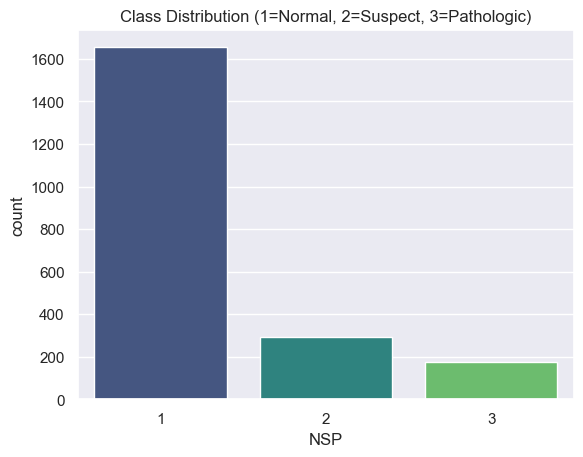

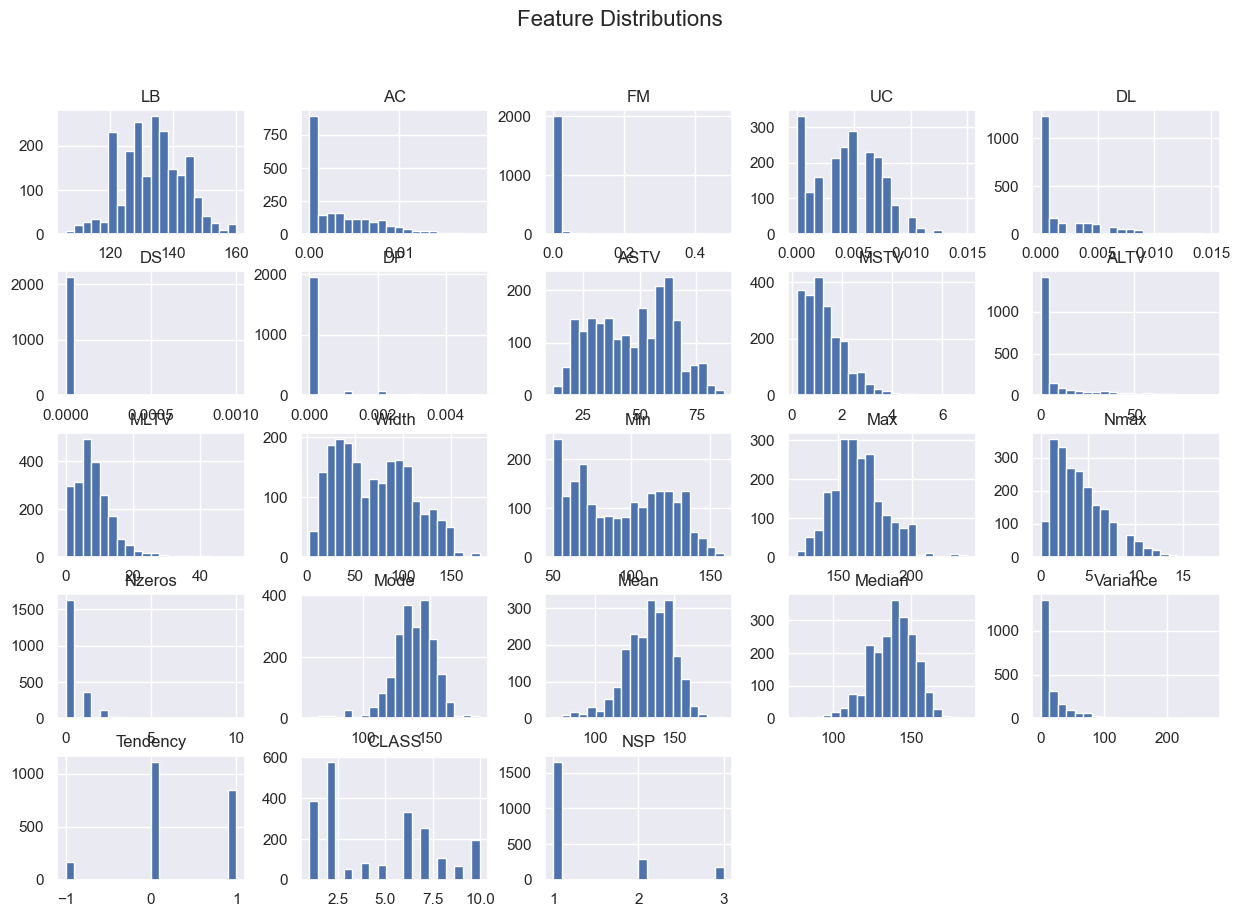

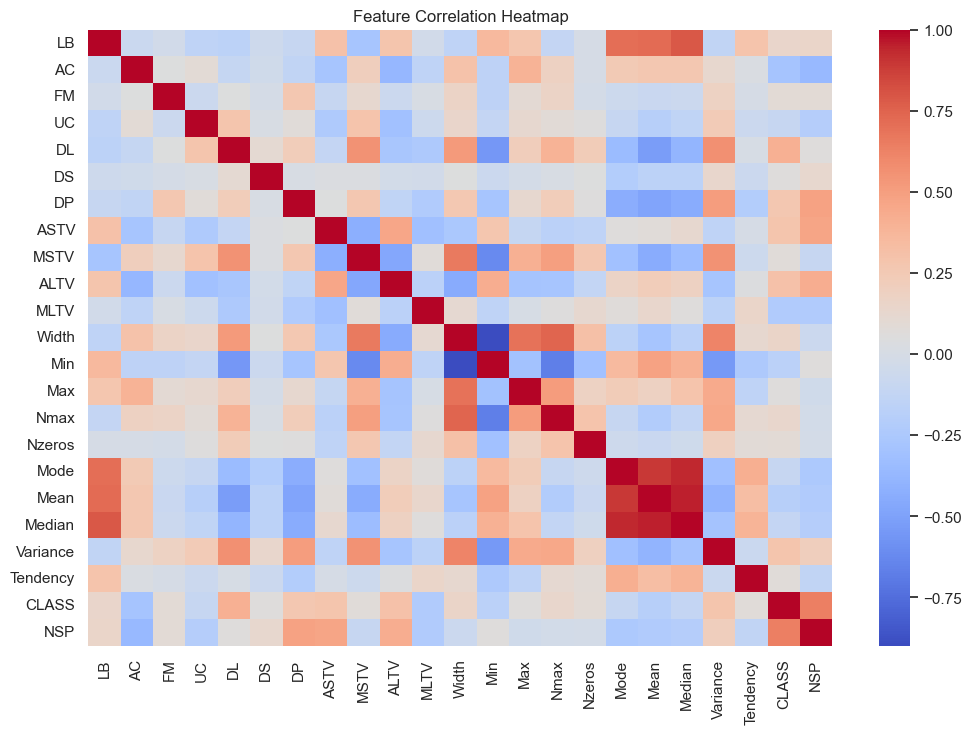

C:\Users\user\AppData\Local\Temp\ipykernel_21388\3799140462.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NSP", y="LB", data=df, palette="Set2")


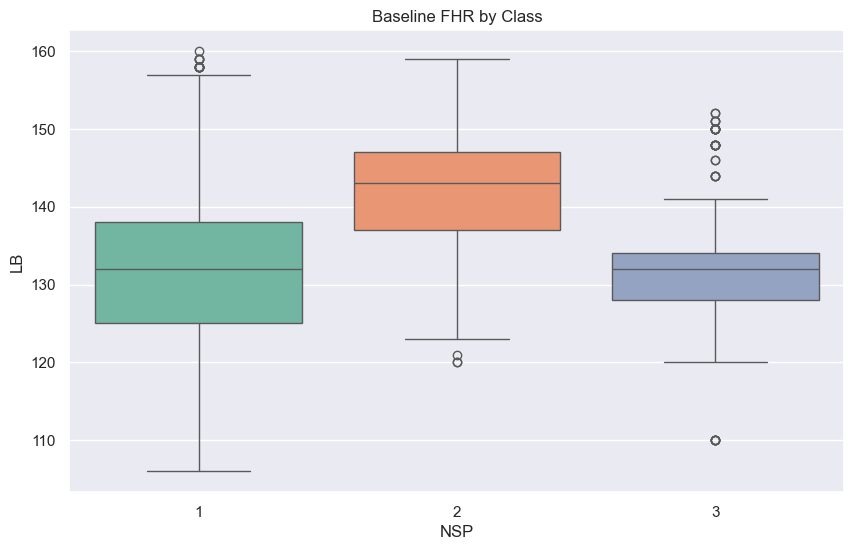

In [4]:
cardiotocography = fetch_ucirepo(id=193) 
  
X = cardiotocography.data.features 
y = cardiotocography.data.targets 
  
print(cardiotocography.metadata) 
  
print(cardiotocography.variables) 

df = pd.concat([X, y], axis=1)

print("Shape:", df.shape)
print("\nFirst rows:\n", df.head())
print("\nTarget distribution:\n", df['NSP'].value_counts())

# Checking for missing values + info
print(df.isnull().sum())
print(df.dtypes)

# Descriptive Stats
print(df.describe)

# Class Distribution
sns.countplot(x="NSP", data=df, palette="viridis")
plt.title("Class Distribution (1=Normal, 2=Suspect, 3=Pathologic)")
plt.show()

# Histogram
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Differences
plt.figure(figsize=(10,6))
sns.boxplot(x="NSP", y="LB", data=df, palette="Set2")
plt.title("Baseline FHR by Class")
plt.show()

In [5]:
nsp_df= pd.DataFrame(df['NSP'])

In [16]:
"""for variable in df.columns[:-1]:  # Exclude the target variable 'NSP'
    plt.figure(figsize=(10,6))
    sns.boxplot(x="NSP", y=variable, data=df, palette="Set3")
    plt.title(f"{variable} by Class")
    plt.show()"""

'for variable in df.columns[:-1]:  # Exclude the target variable \'NSP\'\n    plt.figure(figsize=(10,6))\n    sns.boxplot(x="NSP", y=variable, data=df, palette="Set3")\n    plt.title(f"{variable} by Class")\n    plt.show()'

C:\Users\user\AppData\Local\Temp\ipykernel_21388\3890624656.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.columns[-1], y=variable, data=df, ax=ax, palette="Set3", showfliers=False)
C:\Users\user\AppData\Local\Temp\ipykernel_21388\3890624656.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.columns[-1], y=variable, data=df, ax=ax, palette="Set3", showfliers=False)
C:\Users\user\AppData\Local\Temp\ipykernel_21388\3890624656.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.columns[-1], y=variable, data=df, ax=ax, pa

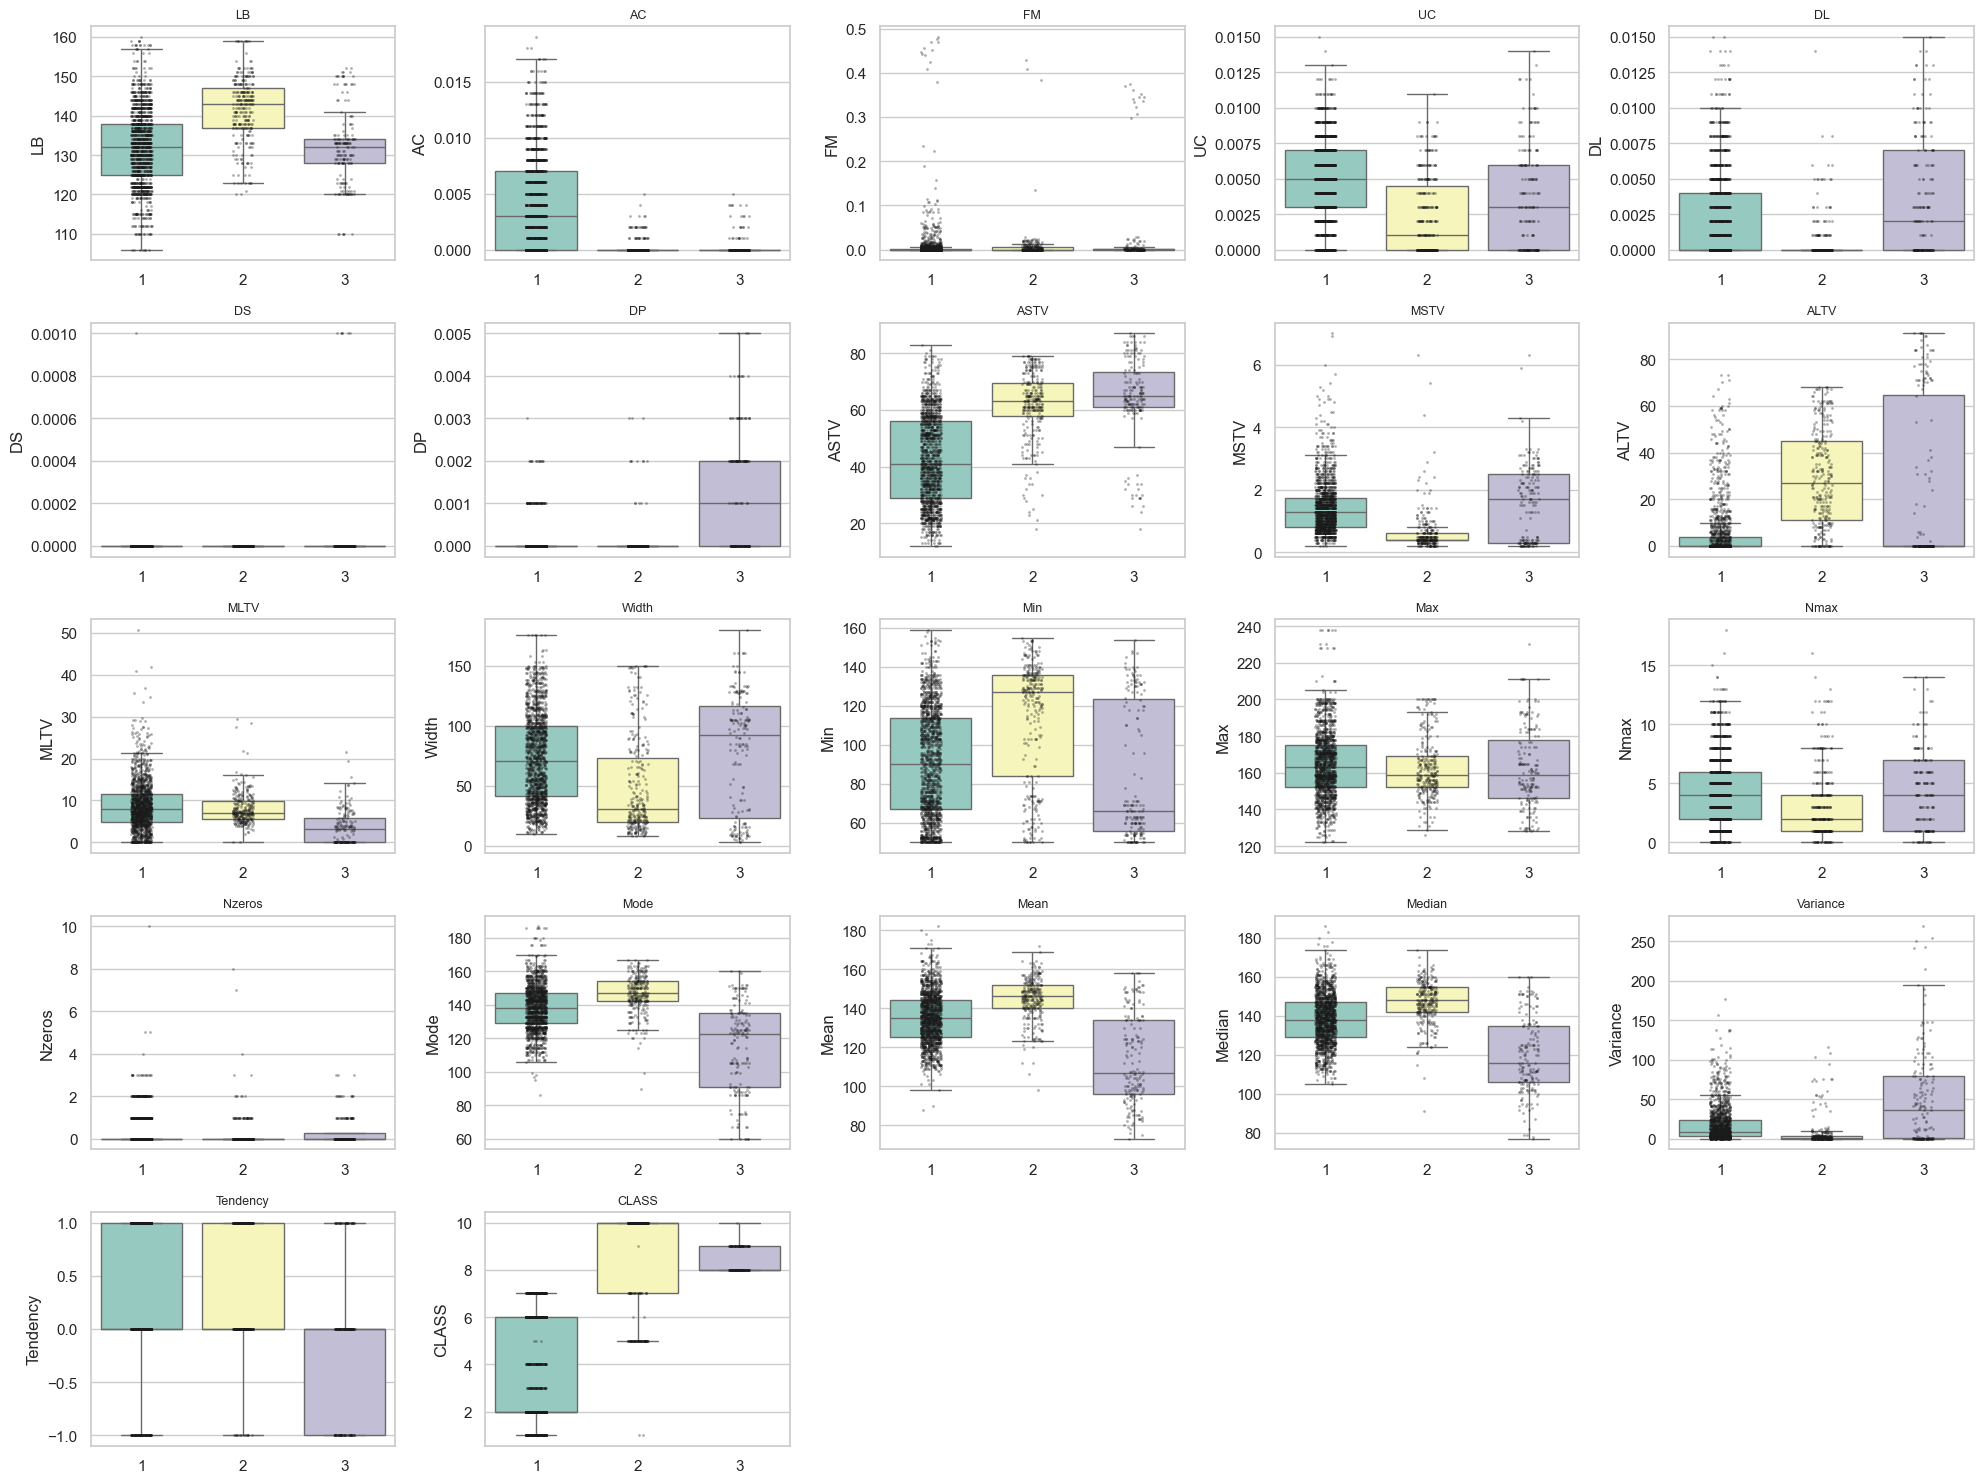

In [15]:
sns.set(style="whitegrid")

features = df.columns[:-1]            # all columns except the last (assumed target)
n = len(features)
ncols = 5                             # change this to more/less columns per row
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
axes = axes.flatten()

for i, variable in enumerate(features):
    ax = axes[i]
    sns.boxplot(x=df.columns[-1], y=variable, data=df, ax=ax, palette="Set3", showfliers=False)
    sns.stripplot(x=df.columns[-1], y=variable, data=df, ax=ax, color="k", size=2, jitter=True, alpha=0.35)
    ax.set_title(variable, fontsize=9)
    ax.set_xlabel("")

# remove any extra empty axes (if grid has more slots than features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("all_boxplots.png", dpi=200, bbox_inches="tight")   # optional: saves the single image
plt.show()